# Question D10

*Question*: Considering the ML-enabled system projects in which you participated, which project management frameworks were applied?

*Answer Type*: Multiple Option and Free Field

*Options*: [To the best of my knowledge none, CRISP-DM, Kanban, Lean, RUP/Open UP, SAFe, Scrum, Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
frameworks = {
    'D10_ML_Management_Framework_None': 'None',
    'D10_ML_Management_Framework_CRISP-DM': 'CRISP',
    'D10_ML_Management_Framework_Kanban': 'Kanban',
    'D10_ML_Management_Framework_Lean': 'Lean',
    'D10_ML_Management_Framework_RUP': 'RUP',
    'D10_ML_Management_Framework_SAFe': 'SAFe',
    'D10_ML_Management_Framework_Scrum': 'Scrum',
    'D10_ML_Management_Framework_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['D10_ML_Management_Framework_None', 'D10_ML_Management_Framework_CRISP-DM', 'D10_ML_Management_Framework_Kanban',
         'D10_ML_Management_Framework_Lean','D10_ML_Management_Framework_RUP', 'D10_ML_Management_Framework_SAFe', 
         'D10_ML_Management_Framework_Scrum', 'D10_ML_Management_Framework_Others', 'D10_ML_Management_Framework_Others_Free']].head()

,D10_ML_Management_Framework_None,D10_ML_Management_Framework_CRISP-DM,D10_ML_Management_Framework_Kanban,D10_ML_Management_Framework_Lean,D10_ML_Management_Framework_RUP,D10_ML_Management_Framework_SAFe,D10_ML_Management_Framework_Scrum,D10_ML_Management_Framework_Others,D10_ML_Management_Framework_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99
4,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for framework in frameworks:
    indexes.append(frameworks[framework])
    values.append(dataframe_obj.df[framework].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in framework else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['D10_ML_Management_Framework_None'] == 'quoted' or row['D10_ML_Management_Framework_CRISP-DM'] == 'quoted' or row['D10_ML_Management_Framework_Kanban'] == 'quoted' or row['D10_ML_Management_Framework_Lean'] == 'quoted' or row['D10_ML_Management_Framework_RUP'] == 'quoted' or row['D10_ML_Management_Framework_SAFe'] == 'quoted' or row['D10_ML_Management_Framework_Scrum'] == 'quoted' or row['D10_ML_Management_Framework_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
d10_plot = PlotUtils(pd.DataFrame(
    data={'Framework': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


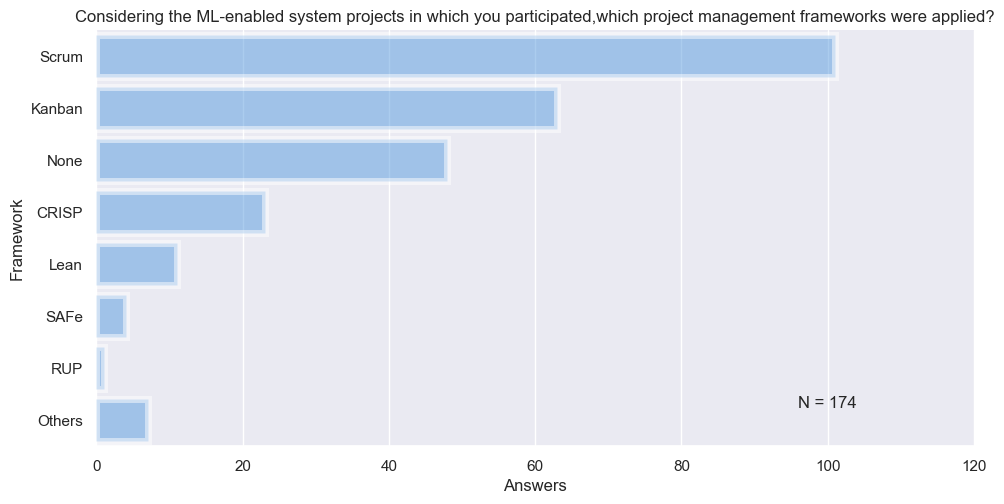

In [9]:
d10_plot.single_barplot(x_axis="Answers", y_axis="Framework",
                       title="Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
                       x_label="Answers", y_label="Framework", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
frameworks_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D10_ML_Management_Framework_Others_Free'])))
frameworks_free = list(filter(lambda a: str(a) != 'nan', frameworks_free))

In [11]:
frameworks_words = format_wordcloud_text(texts=frameworks_free, use_sep=False)

In [12]:
# plot object
d10_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(frameworks_words.keys()), 'Weight': list(frameworks_words.values())}
))

In [13]:
d10_wc_plot.df.head(6)

,Word,Weight
0,Task List,1
1,V model,1
2,Tailored Waterfall/Agile,1
3,Kaizen,1
4,TMVA - Toolkit for Multivariate Data Analysis,1
5,"agile style (iterative, regular meetings,...) ...",1


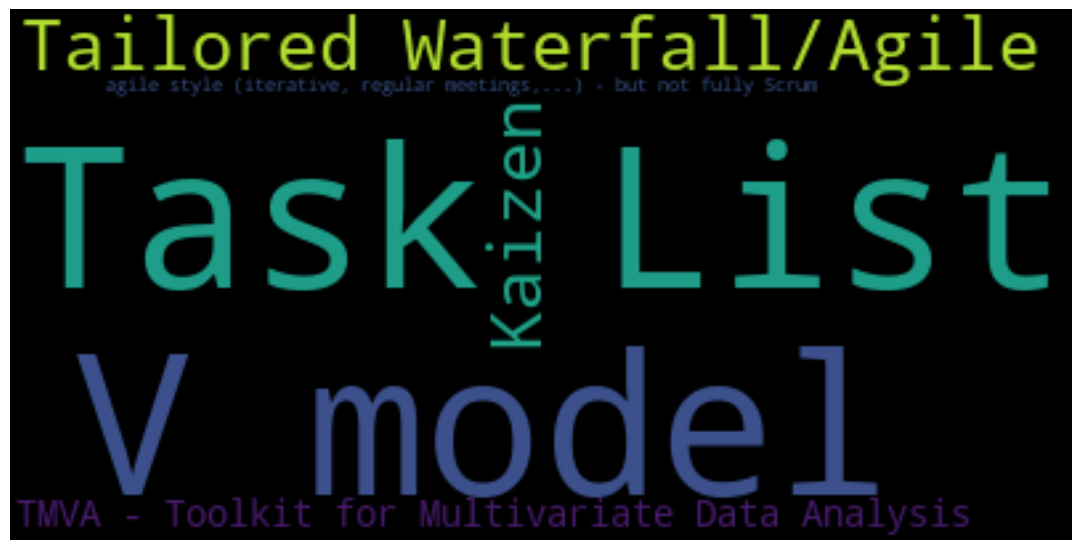

In [14]:
d10_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [15]:
prefix = "D10_ML_Management_Framework_"

In [16]:
# the possible answers are the ones in columns
valid_options_list = [framework_column.split(prefix)[1] for framework_column in frameworks]

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'None' was assigned - in terms of meaning 'I don't know'
    if not answer:
        answer = ['None']
    valid_answers_list.append(answer)

In [18]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
values = [100 * v for v in values]

In [22]:
# plot object for bootstrapped data
d10_boot_plot = PlotUtils(pd.DataFrame(
    data={'Framework': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


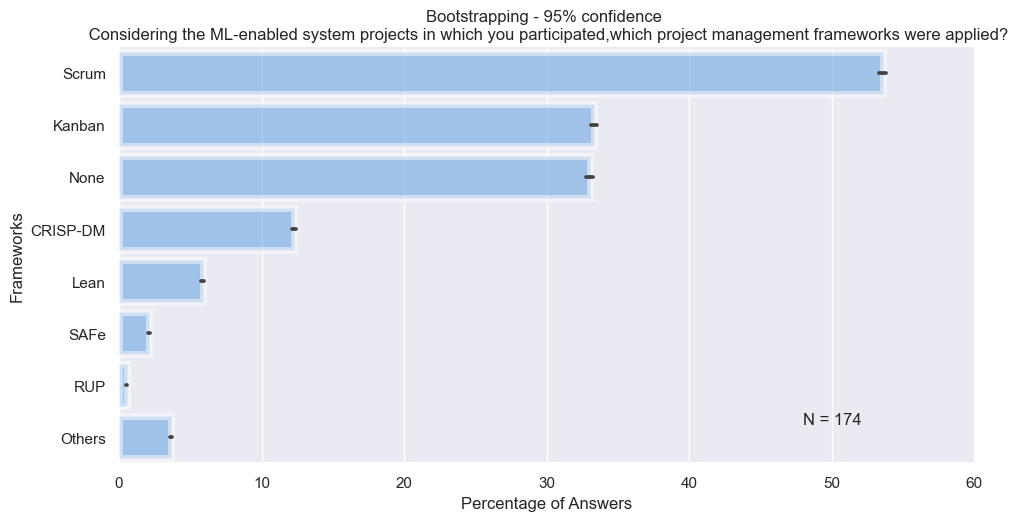

In [23]:
d10_boot_plot.single_barplot(x_axis="Value", y_axis="Framework", 
                       title="Bootstrapping - 95% confidence \n Considering the ML-enabled system projects in which you participated,which project management frameworks were applied?",
                       x_label="Percentage of Answers", y_label="Frameworks", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
None:(0.3277217454594926, 0.33033333333333337, 0.3329449212071741)
CRISP-DM:(0.12115003199125458, 0.1225919540229885, 0.12403387605472242)
Kanban:(0.3312189703016706, 0.3335172413793104, 0.3358155124569502)
Lean:(0.05769342781337515, 0.05883333333333334, 0.05997323885329153)
RUP:(0.004947888602795653, 0.005304597701149425, 0.005661306799503198)
SAFe:(0.02057872700928825, 0.02133908045977011, 0.022099433910251973)
Scrum:(0.5334078696929115, 0.5358793103448277, 0.5383507509967439)
Others:(0.03558559550602333, 0.03647701149425287, 0.03736842748248241)


In [25]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
None:: P = 33.033 [32.772, 33.294]
CRISP-DM:: P = 12.259 [12.115, 12.403]
Kanban:: P = 33.352 [33.122, 33.582]
Lean:: P = 5.883 [5.769, 5.997]
RUP:: P = 0.53 [0.495, 0.566]
SAFe:: P = 2.134 [2.058, 2.21]
Scrum:: P = 53.588 [53.341, 53.835]
Others:: P = 3.648 [3.559, 3.737]
